# Overview

I.) Objectives   

II.) Introduction to Bayes Theorem   
* Derivation of Bayes Theorem    
* Example Problem

III.) Deriving the Posterior Distribution    
* Bayes Factor
* Interval Estimation


IV.) Estimating a Binomial Proportion   
* Bernoulli Trials    
* Inference on a coin
            1.) Notation and Assumptions    
            2.) Define the prior    
            3.) Generate the data    
            4.) Define and plot the Likelihood    
            5.) Find and plot the Posterior
* Summary of a Frequentist Approach            
            
V.) Introduction to the German Tank Problem    
* Background    
* Discrete Uniform Distribution    
* Notation    
* Sampling Algorithims    
* Example with K = 4     
* Example with K = 1
* Summary of Frequentist Approach
  
VI.) Summary    
* Advantages of Using a Bayesian Approach
* Disadvantages of Using a Bayesian Approach

VII.) References    

VIII.) Further Reading    
            
            

# Objectives
* Derieve Bayes Theorem
* Familiarize yourself with terminology such as informative/uninformative prior, conjugate prior and more
* Show how a binomial proportion is estimated using a Beta prior and a Bernoulli Likelihood
* Familiarize the reader with the use of different priors
* Familiarize the reader with common sampling algorithims
* Be able to discuss the general advantages and disadvantages of a Bayesian approach    
* Give the reader resources to learn more

## Derivation of Bayes Theorem
We can easily derieve Bayes Theorem from the defintion of conditional probability.

Defintion of Conditional Probability: Let $A$ and $B$ be events in the sample space and $P(B)>0$. The conditional probability of event $A$ given event $B$, denoted $P(A|B)$ is defined as

$$
P(A|B) = \frac{P(A \cap B )}{P(B)}.
$$

Similarily, given that $P(A)>0$ the conditional probability of $B$ given $A$ is given as 
$$
P(B|A) = \frac{P(B \cap A)}{P(A)}.
$$

Using this we can conclude that the $P(B \cap A)$ is given by
$$
 P(B \cap A)= P(A) P(B|A) = P(B) P(A|B).
$$

Now we can express the $P(B|A)$ as,
$$
P(B|A) = \frac{P(B) P(A|B)}{P(A)}.
$$

If B is partitioned into the events $B_1, B_2, \ldots B_m$, then we can write $P(A)$ as
$$
P(A) = \sum_{i=1}^m P(B_i)P(A|B_i).
$$

Therefore, for each $j = 1,2, \ldots$,m the $P(B_j|A)$ is given by
$$
P(B_j|A) = \frac{P(B_j) P(A|B_j)}{\sum_{i=1}^m P(B_i)P(A|B_i)}. \hspace{6mm} \mbox{(1)}
$$


See sources [2] and [3] for more detail.

## Example Problem
Suppose a disease afflicts $1$ in $1,000$ individuals in a population. A test has been developed for this disease. An idividual with the disease will test positive for the disease 99% of the time, and an individual without the disease will test postive 1% of time. 

Suppose an individual is selected at random and tested for the disease. The test shows a positive result. What is the probability that this individual actually has the disease?

Let D be the event that the selected person has the disease.    
Let A be the event that the selected person tests positive for the disease.

From the the problem we can deduce that $P(D) = 0.001$, $P(A|D) = 0.99$, and $P(A|D^C) = 0.01$.    
Since $P(D) = 0.001)$ we can conclude that $P(D^C) = 1-P(D) = 0.999)$. 

Using equation (1) we can conclude  
$$
\begin{align}
P(D|A) &= \frac{P(D)P(A|D)}{P(D)P(A|D) + P(D^C)P(A|D^C)}\\
\\
&= \frac{0.001*0.99}{0.001*0.99 + 0.999*0.01}\\
\\
&\approx 0.0902
\end{align}
$$

# Deriving the Posterior Distribution
Estimation in the Bayesian context differs from the Frequentist context in that the parameter of interest is treated as a random variable. Bayes theorem allows us to combine two functions the prior and the Likelihood to obtain the posterior distribution. 

## Notation
* $\theta$- the parameter we are interested in estimating    
* $\pi(\theta)$- the prior on $\theta$     
* $X \sim f(x|\theta)$- $X$ is distrubuted according to $f(x|\theta)$     
* $\boldsymbol{X}=(X_1, X_2, \ldots, X_n)$- a random sample of data   
* $\pi(\theta|\boldsymbol{x})$- the posterior distribution given we have observed the sample $\boldsymbol{X}=\boldsymbol{x}$

## The prior
There are different types of priors. Here is a list of useful terminology often used when describing priors.

* Hyperparameters- the parameters of the prior distribution    
* Informative prior- expresses a certain belief about the parameter    
* Uninformative prior- expresses a vague or general belief about the parameter    
* Improper prior- a prior that does not integrate or sum to $1$         
* Conjugate prior- when for a given likelihood the prior distribution and the posterior distribution have the same functional form the prior distribution is called a conjugate prior for the given likelihood

See [6] for more detail regarding each of these.



## Define the Likelihood
Denote the random sample of size $n$ as $\boldsymbol{X}=(X_1, X_2, \ldots, X_n)$. Let $f(\boldsymbol{x}| \theta)$ denote the joint pdf [probability density function] or pmf [probability mass function] of the sample $\boldsymbol{X}=\boldsymbol{x}$, the function of $\theta$ defined by
$$
L(\theta| \boldsymbol{x}) = \prod_{i = 1}^n f(x_i | \theta).
$$
is called the likelihood function.

See Casella and Berger [5] for more detail regarding the definition of the likelihood.

## Deriving the Posterior Distribution
The posterior distrubtion is the function of $\theta$ proportional to
$$
\pi (\theta|\boldsymbol{x}) \propto \pi(\theta) L(\theta|\boldsymbol{x}).
$$


The normalizing constant can be found by integrating or summing over $\pi(\theta) L(\theta|\boldsymbol{x})$ with respect to $\theta$. Thus, in general we can write the posterior distribution for a single parameter $\theta$ given we have observed the sample $\boldsymbol{X}=\boldsymbol{x}$ as

$$
\pi (\theta|\boldsymbol{x}) = 
\frac{\pi(\theta) L(\theta|\boldsymbol{x})}{\int \pi(\theta) L(\theta|\boldsymbol{x}) d \theta}.
\hspace{6mm} \mbox{(2)}
$$

See Doing Bayesian Data Analysis by John Krushke [8] for a similar derivation.

### Bayes Factor
John Krushke [8] describes the term $\pi(\boldsymbol{x}| M) =\int \pi(\theta) L(\theta|\boldsymbol{x}) d \theta$ as the "evidence" for the model $M$ given the data $\boldsymbol{x}$. Here $M$ is our model, the mathematical represenation of our problem.

Given two models $M_1$ and $M_2$ the ratio

$$
\frac{\pi(\boldsymbol{x}| M_1)}{\pi(\boldsymbol{x}| M_2)}
$$
is called Bayes Factor.

### Interval Estimation
Since posterior distrubtions are probability distributions you can employ a more probabilistic interpretation. For example, for real numbers $a,b$ you can describe the $P(a \leq \theta \leq b)$ whereas in the frequentist setting this does not make sense because the parameter of interest is treated as a fixed constant.

Some important terms to be familiar with:
* $(1-\alpha)\%$ Credible set- an interval such that that the probability that $\theta$ in the domain of posterior probability such that the probability that $\theta$ is in the interval is equal to $1-\alpha$. These are not unique.

* Highest Posterior Density (HPD) Interval-  the narrowest region of the posterior distribution with probability coverage equal to $1-\alpha$.

See Gelman et al. [6] for more detail regarding credible sets and HPD's.

# Bernoulli Trials
A Bernoulli trial is trial in which there is exactly two possible outcomes, "success" and "failure". Defining the random variable, $X$ as $1$ is the Bernoulli trial is a "success" and $0$ if the Bernoulli trial is a "failure", the probability mass function (pmf) of a Bernoulli random variable is given by 

$$
f(x|\theta) = 
\begin{cases}
\theta^x (1-\theta)^{1-x} \hspace{5mm} & \mbox{for} \hspace{3mm} x \in \{0,1\}
\hspace{6mm} \mbox{(3)}\\
0 & \mbox{otherwise}.\\
\end{cases}
$$

Alternatively, $f(x|\theta)$ can also be expressed as
$$
f(x|\theta) = 
\begin{cases} 
      \theta & \mbox{ for $x = 1$} \\
      1 - \theta & \mbox{ for $x = 0$ } \\
      0 & \mbox{otherwise}
   \end{cases}.
$$

## Inference on a coin
Suppose the Patriots are accused of rigging a coin, and we are tasked with investigating the matter. 

Let's define the Bernoulli random variable $X$ as 
$$
X = \begin{cases} 
      1 & \textrm{if the coin shows heads} \\
      0 & \textrm{if the coin shows tails } \\
   \end{cases}.
$$

### Notation and Assumptions
$n$- the number of times we flip the coin   
$X_1, X_2, \ldots, X_n$- the resepective Bernoulli trial    
$X_1, X_2, \ldots, X_n$ are independent   
$Y = \sum_{i=1}^n X_i$   
$\theta$- the probability the coin shows Heads (i.e.the $P(X = 1)$) 

### Define the prior
Let's define the prior, $\pi(\theta)$ using a beta distribution.
$$
\pi(\theta|\alpha, \beta) =
\begin{cases} \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} 
\theta^{\alpha - 1} (1-\theta)^{\beta - 1}
& \textrm{for $\theta \in [0,1]$}\\
0 & \textrm{otherwise}
\end{cases}
$$

The mean and variance of the beta distribution are given by $\frac{\alpha}{\alpha + \beta}$ and 
$\frac{\alpha \beta}{(\alpha + \beta)^2(\alpha +\beta + 1)}$, respectively [10].

#### Define Hyperparameters and Generate Data in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

#Define hyperparameters for U(0,1) prior
prior_alpha, prior_beta = 1,1

#Define parameter and sample size
theta , n = 0.75, 100

#Generate Data
x = np.random.binomial(1, theta, n)
y = x.sum()

#NFL CTE Interview [11]
#Specify the hyperparameters
# prior_mean = 1/1000
# prior_alpha = 0.01
# prior_beta = prior_alpha/prior_mean - prior_alpha
# #Specify the data
# n = 4
# x = np.repeat(1, n)
# y = x.sum()

print("There are "+ str(y) + " successes out of " + str(n) + " trials.")


There are 74 successes out of 100 trials.


#### Plot the Prior

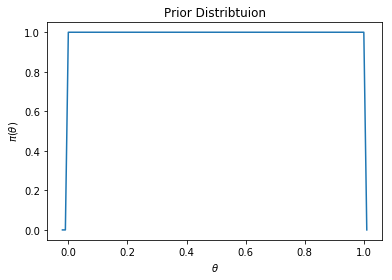

In [2]:
xgrid = np.arange(-0.02,1.02,0.01)
#Evaluate the prior over the grid
prior_of_xgrid = beta.pdf(xgrid, a = prior_alpha, b = prior_beta)


#Plot the prior distribution
plt.plot(xgrid, prior_of_xgrid)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\pi(\theta)$')
plt.title("Prior Distribtuion")
plt.show()


### Define the Likelihood

Since $X_1, X_2, \ldots, X_n$ are Bernoulli random variables,  using equation (3) the likelihood is given by
$$
\begin{align}
L(\theta|y) &= \prod_{i=1}^n f(x_i|\theta) \\ 
 &= \prod_{i=1}^n \theta^{x_i}(1-\theta)^{1-x_i}\\
 &= \theta^{\sum_{i=1}^n x_i}\hspace{2mm} (1-\theta)^{n - \sum_{i=1}^n x_i}\\
 &= \theta^{y}\hspace{2mm} (1-\theta)^{n - y}.
\end{align}
$$

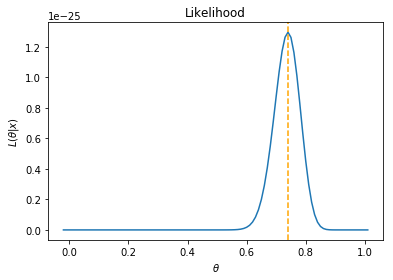

In [3]:
#Define the Likelihood
def Lhood_bern(theta):
    out = theta**y *(1-theta)**(n - y)
    return(out)


#Plot the Likelihood
plt.plot(xgrid, Lhood_bern(xgrid))
plt.axvline(x.mean(), color='orange', linestyle ="--")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta | x)$')
plt.title("Likelihood")
plt.show() 

The likelihood function $L(\theta$|y) shown with the vertical, dashed line represents the maximum likelihood estimate for $\theta$, in this case $\bar x$.

# Compute the Posterior
Now that we have the prior and likelihood we can find the posterior following equation (2) as follows:
$$
\begin{align}
\pi (\theta|y) &\propto \pi(\theta) L(\theta|y)\\
&\propto \theta^{\alpha - 1} (1-\theta)^{\beta - 1} \theta^{y}\hspace{2mm} (1-\theta)^{n - y}\\
&\propto \theta^{\alpha + y - 1} (1-\theta)^{\beta + n - y - 1}\\
&\sim Beta(\alpha + y, \beta + n -y)
\end{align}
$$

NOTE: When for a given likelihood the prior distribution and the posterior distribution have the same functional form the prior distribution is called a conjugate prior for the given likelihood.

#### Implement Posterior in Python

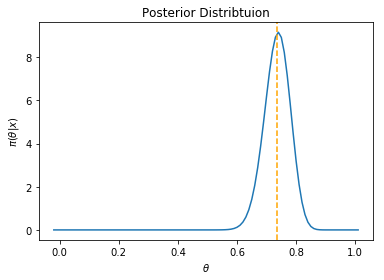

In [4]:
#Define Posterior hyperparameters
posterior_alpha = prior_alpha + y
posterior_beta = prior_beta + n - y

#Create functions to compute posterior mean and standard deviation
def beta_mean(a, b):
    return(a/(a + b))

def beta_stdv(a, b):
    denom = (a + b)**2 *(a + b + 1)
    vrnc = a*b/denom
    return(np.sqrt(vrnc))

post_mean = beta_mean(posterior_alpha, posterior_beta)
post_stdv = beta_stdv(posterior_alpha, posterior_beta)

#Compute Credible set
level = 0.05
lower = beta.ppf(level / 2, a=posterior_alpha, b=posterior_beta)
upper = beta.ppf(1 - level / 2, a=posterior_alpha, b=posterior_beta)


#Evaluate the postior over the grid
posterior_of_xgrid = beta.pdf(xgrid, a = posterior_alpha, b = posterior_beta)
#Plot the posterior
plt.plot(xgrid, posterior_of_xgrid)
plt.axvline(x=post_mean, color='orange', linestyle='--')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\pi(\theta | x)$')
plt.title("Posterior Distribtuion")
plt.show()


The posterior distribution for $\theta$ with a Beta prior and Bernoulli likelihood. The dashed line is the posterior mean.

In [5]:
print("The posterior mean is "+ str(post_mean) + 
" and the posterior standard deviation is " + str(post_stdv ) + ".")

The posterior mean is 0.735294117647 and the posterior standard deviation is 0.0434704093308.


In [6]:
print("For our credible set, our lower bound is  "+ str(lower) + 
" and our upper bound is " + str(upper)+".")

For our credible set, our lower bound is  0.645986554218 and our upper bound is 0.815865054072.


## Summary of a Frequentist Approach
As mentioned the Frequentist approach treats $\theta$ as a fixed constant. A common approach in estimating a binomial proportion is to compute the MLE (Maximum Liklihood Estimate) of $\theta$ by maximizing the likelihood function. In this case the MLE is given by 
$$
\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i.
$$
The Frequentist approach would involve describing the distribution of the sampling statistic, in this case $\bar{X}$. The Central Limit Theorem states that $\bar{X}$ is approximately normally distributed with mean equal to the population mean and variance equal to the population variance divided by the sample size. In this case, $\bar{X}$ is approximately distributed as $N(\theta, \frac{\theta (1-\theta)}{n})$. Therefore,
$$
Z = \frac{\bar{X}- \theta}{ \sqrt{\frac{\theta (1-\theta)}{n}}}
$$
is approximately normally distributed with mean 0 and variance 1. Thus, you can perform null hypothesis significance testing by choosing a particular null value for $\theta$ and a significance level [1] [4].

# German Tank Problem
In WWII, Germany manufactured their tanks with consectuive serial numbers. The Allied Powers sought to exploit this to help them determine how many tanks Germany possessed. Comparison of German records to statistical estimates shows that the statistical estimates were much more accurate then the intelligence estimates .

The problem can be defined as estimating the maximum of a discrete uniform distribution based on a sample without replacement.

#### Discrete Uniform Distribution
A random variable X is said to have the discrete uniform distribution if and only if the the probability mass function is given by
$$
P(X =x |N) = 
\begin{cases}
\frac{1}{N} & \mbox{for $x \in \{ a, a+1, \ldots b \} $ where $N = b - a +1$}\\
0 & \textrm{otherwise}.\\
\end{cases}
$$

### Notation
$N$ is the maximum serial number; $n$ is a realized value for $N$   
$M$ is the maximum serial number in the sample; $m$ is a realized value for $M$  
$k$ is the number of tanks in the sample  

## Example with k = 4
Suppose we observe 4 tanks with the highest serial number being 60.

#### The prior
In this analysis we will take the improper uniform prior over all non-negative integers given as
$$
P(N=n) \propto 
1 \hspace{4mm} \mbox{for $n \in \{0, 1, 2, \ldots \}$}.
$$

#### The Likelihood
The likelihood is given by
$$
P(M = m|n,k) = 
\begin{cases}
\frac{\binom{m-1}{k-1}}{\binom{n}{k}} & \mbox{for $m \leq k$}\\
0 & \mbox{otherwise}.
\end{cases}
$$

#### Posterior 
Given the likelihood and prior above, Hohle and Held [7] showed that the posterior distrubtion for $N$ by observing $k > 1$ tanks with maximum serial number $M$ is given by
$$
P(N = n \hspace{1mm}| \hspace{1mm} M=m)= 
\begin{cases}
0 & \textrm{if $n<k$}\\
\frac{k-1}{m} 
\frac{\binom{m}{k}}{\binom{n}{k}} & \textrm{if $n \geq k$}
\end{cases}.
$$

#### Posterior mean  and standard deviation
For $k>3$ the posterior mean $\mu$ and standard deviation $\sigma$ are given by
$$
\begin{align}
\mu &= \frac{(m-1)(k-1)}{k-2} \\
\sigma &= \sqrt{\frac{(m-1)(k-1)(m-k+1)}{(k-3)(k-2)^2}}
\end{align}
$$

#### Implementation in Python

In [7]:
#Define the parameters
m = 60
k = 4
N = np.array(range(1,201))

Below are a python function for computing the posterior distribution, posterior mean, and posterior standard deviation based on the above three equations.

In [8]:
from scipy.misc import comb

def eval_point(n):
    if n <m:
        return(0)
    else:
        numer = (k-1)/k *comb(m-1,k-1)
        denom = comb(n, k)
        return(numer/denom)

def posterior(n):
    list_eval_points = []
    for m in n:
        eval = eval_point(m)
        list_eval_points.append(eval)
    out = np.array(list_eval_points)
    return(out)
def posterior_mean(M=m, K=k):
    numer = (M-1)*(K-1)
    denom = K-2
    return(numer/denom)
    
def posterior_stdev(M=m, K=k):
    numer = (m-1)*(k-1)*(m-k+1)
    denom = (k-3)*(k-2)**2
    var = numer/denom
    std_dev = np.sqrt(var)
    return(std_dev)


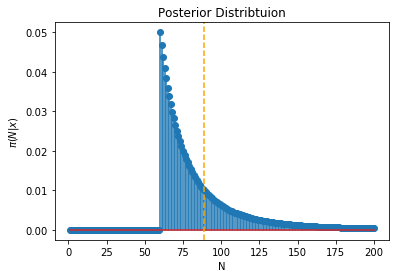

In [9]:
post_mean = posterior_mean()
post_stdv = posterior_stdev()

fig, ax = plt.subplots()
ax.stem(N, posterior(N))
plt.axvline(x=post_mean, linestyle="--", color="orange")
plt.xlabel("N")
plt.ylabel(r'$\pi(N | x)$')
plt.title("Posterior Distribtuion")
plt.show()


In [10]:
print("The posterior mean is "+ str(post_mean)+" and standard deviation is ", str(post_stdv) + ".")

The posterior mean is 88.5 and standard deviation is  50.2220071283.


## Sampling Algorithims
Often times the posterior distrubtion does not have a simple function form. In which case describing the posterior distribution may require a sampling from the posterior distribution using a sampling algorithim. Below are the two most common sampling algorithims used in Bayesian statistics.

* Metropolis-Hastings
* Gibbs Sampling

## Example with k = 1

When $k=1$ we cannot use the approach we did above. Suppose we believe that $N$ is between $0$ and $1,000$, and we observe one tank with serial number $60$. We can use this information to update our beliefs about the existing number of tanks. Usign the discrete uniform distribution with $a=60$ and $b=1000$ and the discrete uniform likelihood with $a=0$ and $b=1000$, we can sample from the posterior distribution using the Metropolis Hastings algorithim with PyMC3 and estimate the number of tanks.


In [11]:
import pymc3 as pm

In [12]:
y = np.array([60])

model = pm.Model()
with model:
    #Prior Discrete Uniform(y.max(), 1000)
    N = pm.DiscreteUniform("N", lower=y.max(), upper=1000)
    #Likelihood Discrete Uniform(0, upper = 1000)
    y_obs = pm.DiscreteUniform("y_obs", lower=0, upper=N, observed=y)
    
    step = pm.Metropolis()
    start = {"N": y.max()}
    trace = pm.sample(100000, step, start, chain=1, njobs=1)

100%|███████████████████████████████| 100000/100000 [00:08<00:00, 11548.56it/s]


In [13]:
pm.summary(trace[10000:])


N:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  337.752          256.952          2.396            [60.000, 873.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  64.000         124.000        249.000        502.000        935.000



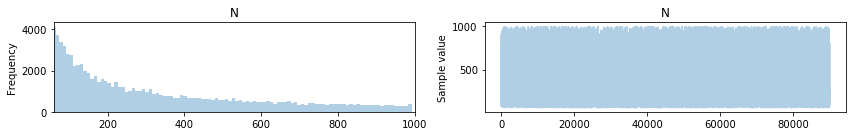

In [14]:
pm.traceplot(trace[10000:])
plt.show()

## Summary of a Frequentist Approach
Leon Goodman obtained the minimum variance unbiased estimator for $N$ given by 
$$
\hat{N} = m + \frac{m}{k} -1.
$$
Goodman also describes the sampling distribution of $\hat{N}$ and computing confidence intervals.

# Summary

## Advantages of a Bayesian Approach
* Incorporating prior knowledge into estimation
* Probabilistic Interpretation
* Model Comparison
* Hypothesis testing
* Power analysis

## Disadvantages of a Bayesian Approach
* Introduces subjectivity
* Computationally inefficient at times
* Communication

# References
[1] “8.1.2.1 - Normal Approximation Method Formulas.” 8.1.2.1 - Normal Approximation Method Formulas | STAT 200, Pennsylvania State University, onlinecourses.science.psu.edu/stat200/node/53.

[2] Casella, George, and Roger L. Berger. “Statistical Inference.” Statistical Inference, 2nd ed., Brooks/Cole Cengage Learning, 2013, p. 20.

[3] Casella, George, and Roger L. Berger. “Statistical Inference.” Statistical Inference, 2nd ed., Brooks/Cole Cengage Learning, 2013, p. 23.

[4] Casella, George, and Roger L. Berger. “Statistical Inference.” Statistical Inference, 2nd ed., Brooks/Cole Cengage Learning, 2013, p. 236.

[5] Casella, George, and Roger L. Berger. “Statistical Inference.” Statistical Inference, 2nd ed., Brooks/Cole Cengage Learning, 2013, p. 290.

[6] Gelman, Andrew, et al. Bayesian Data Analysis. 3rd ed., Chapman & Hall/CRC, 2014

[7] Hohle, Michael, and Leonhard Held. “Bayesian Estimation of the Size of a Population.” 22 Aug. 2017, epub.ub.uni-muenchen.de/2094/1/paper_499.pdf.

[8] Kruschke, John K. Doing Bayesian Data Analysis: a Tutorial with R and BUGS. Academic Press, 2011.

[9] Ruggles, Richard, and Henry Brodie. “An Empirical Approach to Economic Intelligence in World War II.” Journal of the American Statistical Association, vol. 42, p. 89.

[10] Siegrist, Kyle. “The Beta Distribution.” The Beta Distribution, The University of Alabama at Huntsville, 22 Aug. 2017, www.math.uah.edu/stat/special/Beta.html.

[11] “The Numbers Behind Chronic Traumatic Encephalopathy (CTE).” Stats and Stories, Miami University and the American Statistical Association, 17 Aug. 2017, www.cas.miamioh.edu/statsandstories/index.html. Podcast.

# Further Reading
Downey, Allen B. Think Bayes. O'Reilly, 2016.

Gelman, Andrew, et al. Bayesian Data Analysis. 3rd ed., Chapman & Hall/CRC, 2014.

Kruschke, John K. Doing Bayesian Data Analysis: a Tutorial with R, JAGS, and Stan. Academic Press, 2015.

PyMC: Welcome to PyMC3's Documentation! — PyMC3 3.1 Documentation, pymc-devs.github.io/pymc3/index.html.

PyStan: The Python Interface to Stan — PyStan 2.16.0.0 Documentation, pystan.readthedocs.io/en/latest/.

Lindelof, David. “Bayesian Tanks.” R-Bloggers, 19 Nov. 2015, www.r-bloggers.com/bayesian-tanks/.

Slavitt, Isaac. “Solving the Bayesian German Tank Problem with PyMC and PyStan | Isaac Slavitt.” Isaac Slavitt Full Atom, isaacslavitt.com/2015/12/19/german-tank-problem-with-pymc-and-pystan/.
